
# LGT1 Unit07 Day28 - In-Class: Deep Learning with Neural Networks

## Assignment Goals

The goals of this assignment are to:
* Learn about how computers perform image classification
* Learn about the famous MNIST machine-learning training data set
* Construct a simple convolutional neural network
* Visualize and interpret a trained neural network

## Assignment Instructions
Work with your classmates to complete this assignment and upload your notebook to Gradescope at the end of class.

---
# Part 1: The MNIST Dataset
The MNIST database of handwritten digits, which is freely available, is a training set of 60,000 examples and a test set of 10,000 examples.
It is a subset of a larger set available from NIST.
The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.



### Dataset characteristics
The MNIST dataset consists of grayscale images of $10$ handwritten digits, each with a resolution of $28×28$ pixels.
Below are sample images from the MNIST test dataset:

<p align="center"> <img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" style="width: 500px;"/> </p>

A computer interprets an image as a numerical array.
The matrix on the right shows pixel intensity values ranging from $0$ to $255$, representing brightness levels in the image on the left.
Both are combined in the middle image to illustrate how numerical pixel values correspond to visual features.

<p align="center"> <img src="https://user-images.githubusercontent.com/51207580/59979373-bc052480-9604-11e9-85b8-464367fdc891.png" style="width: 500px;"/> </p>

## 1.1 Loading Modules and Data
In this exercise, we'll be using TensorFlow, a powerful open-source library created by Google for machine learning and artificial intelligence.
TensorFlow can handle many types of tasks, but it's especially well known for building and training deep neural networks (DNNs) — the kind of models used in image recognition, natural language processing, and many other AI applications.

We'll use TensorFlow through its high-level interface called Keras, which makes it much easier to build and train models without having to write complex low-level code.

Another key advantage of TensorFlow is that it can run on a GPU (Graphics Processing Unit).
Neural networks often involve a large number of matrix operations, which can be slow on a regular CPU.
GPUs, however, are designed to perform many calculations at once — making them much faster for this kind of work.
TensorFlow uses highly optimized code written in CUDA C++ (through libraries like cuDNN) to take advantage of GPU acceleration and significantly speed up training.

In [ ]:
# the OS module in Python provides functions for interacting with the operating system.
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0" # pick the first availiable GPU on this node

# fix random seed
import numpy as np
from numpy.random import seed
seed(1)

# loading tensorflow and keras
import tensorflow as tf
tf.random.set_seed(2)
import tensorflow.keras as keras
keras.__version__

!nvidia-smi

Thu Nov  6 15:26:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

We’ll load the full MNIST dataset using TensorFlow's built-in function: `tensorflow.keras.datasets.mnist.load_data`.

In [ ]:
# MNIST data is built into the tensorflow library; you only need to load this
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# load the data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In the code above, we split the MNIST dataset into $60,000$ training images and $10,000$ test images.
* Training data is used to teach the model by adjusting its internal parameters.
* Test data is used to evaluate how well the model performs on new, unseen images, after it's been trained.

Each MNIST image has $28 × 28$ pixels and is grayscale, so it has one "channel" (color images typically have three "channels": red, green, and blue).
We divide the pixel values by $255$ to normalize them between $0$ and $1$, which helps the neural network learn more efficiently.

Additionally, the function `to_categorical` converts the integer numebrs ($0, 1, 2, ..., 9$) into one-hot-coded (basis) vectors, which are $10$-dimensional vectors where only one element is $1$ and the rest are $0$:

\begin{align}
    0 \to \begin{bmatrix}
           1 \\
           0 \\
           0 \\
           \vdots \\
           0
         \end{bmatrix}, \hspace{1cm}
    1 \to \begin{bmatrix}
           0 \\
           1 \\
           0 \\
           \vdots \\
           0
         \end{bmatrix}, \hspace{1cm}
    2 \to \begin{bmatrix}
           0 \\
           0 \\
           1 \\
           \vdots \\
           0
         \end{bmatrix}, \qquad \ldots, \qquad
    9 \to \begin{bmatrix}
           0 \\
           0 \\
           0 \\
           \vdots \\
           1
         \end{bmatrix}
  \end{align}
  
where `0` has $1$ in the first element and $0$ for the rest, `1` has $0$ in the first element, $1$ in the scond, and $0$ for the rest of the vector, and so on... This encoding ensures that each digit corresponds to a unique orthogonal vector.

At the end, if our Convolutional Neural Network (CNN) works correctly, the output layer will produce a 10-dimensional vector.
Each element of this vector represents the probability that the input image corresponds to that digit.

## 1.2 Visualize the Training Data
Before training our model, it's helpful to look at some of the training images to understand what the data looks like.
* Each training image already has a label, which is the correct digit ($0, 1, 2, ... 9$).
* These labeled examples are what the model uses to learn patterns so it can make predictions on new, unseen data.

In the code, we will display some images along with their labels to make sure the data is loaded correctly. This type of training is called supervised learning because the model is given the correct answers during training.
There are other approaches called unsupervised learning, where the model tries to find patterns or categories in data without being told the correct answers.

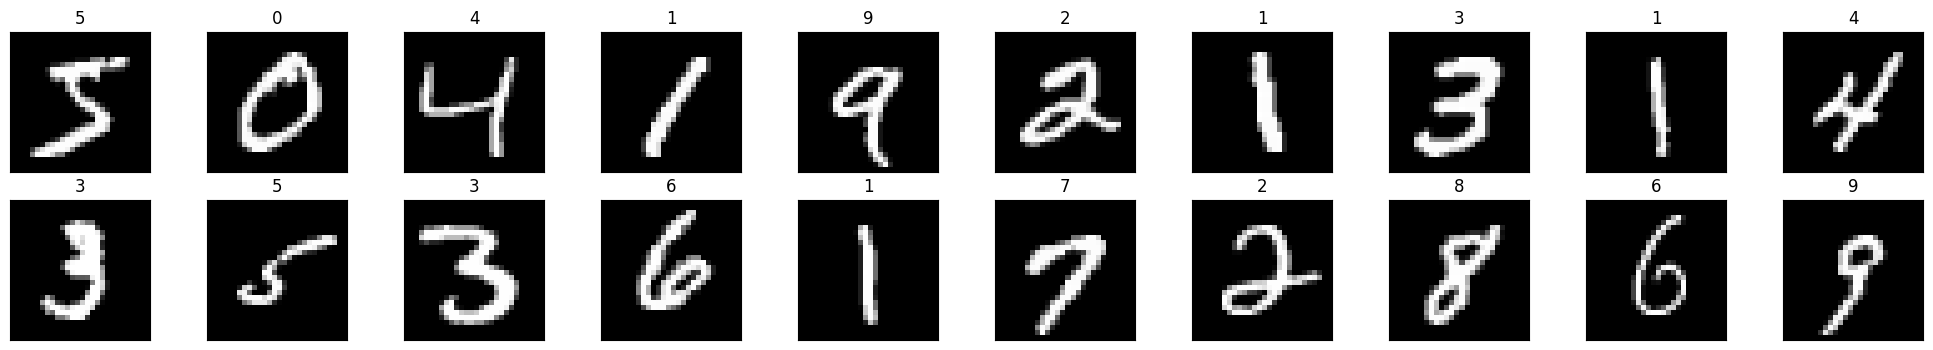

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# obtain one batch of training images
images, labels = train_images[:20], train_labels[:20]

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(np.argmax(labels[idx])))

Now, let's examine one of these images in more detail. What exactly does the neural network see? Let's pick one of the training images and take a closer look...

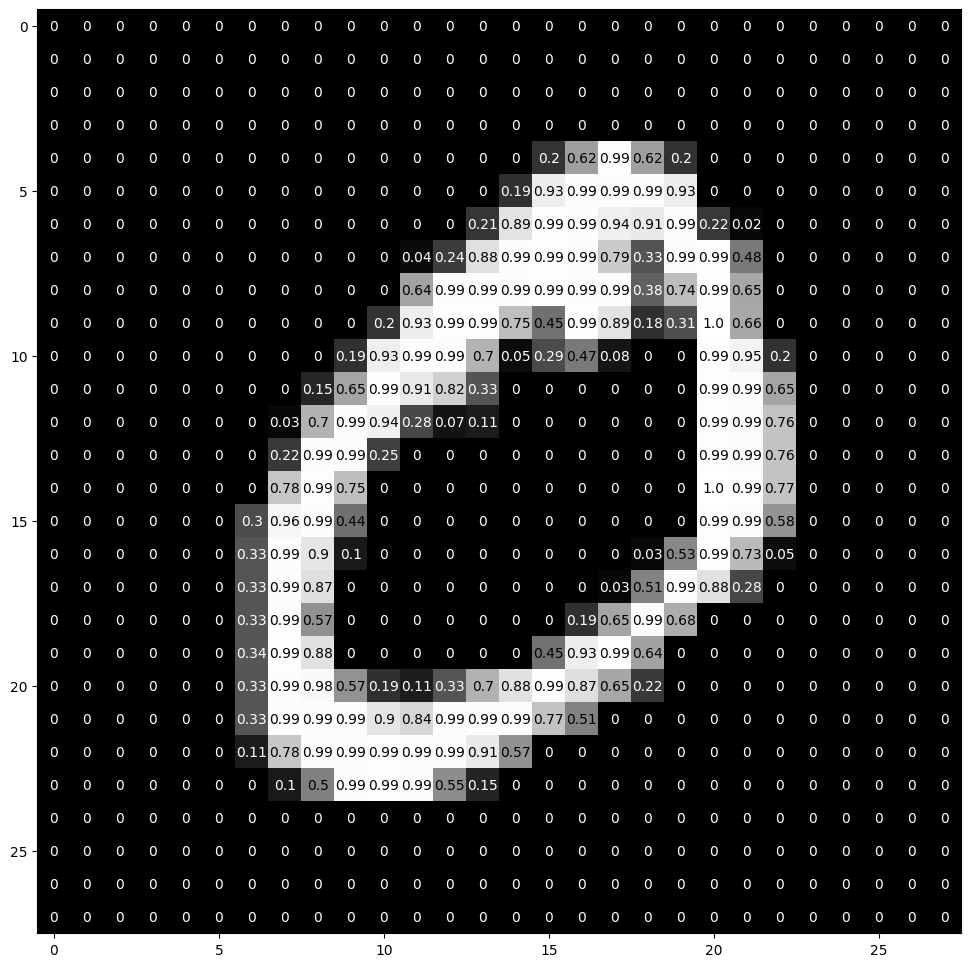

In [ ]:
img = np.squeeze(train_images[1])
fig = plt.figure(figsize = (12,12))
ax  = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

---
# Part 2: Define the Network
The next step is to build the neural network.
Keras provides many of the tools you need to create layers, you just need to import the appropriate layer types and configure their hyperparameters, such as the number of neurons, activation functions, and other settings. Let's walk through this together...

## 2.0: Building Your Model
We begin building the convolutional neural network (CNN) using `models.Sequential` in Keras.
This allows us to stack layers one after another in order, from input to output.
Our CNN looks like this:
<p align="center">
<img src="http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png" style="width: 600px;"/> </p>

Let's understand what each layer does here:

**Convolutional Layer** (`layers.Conv2D`):
* This layer applies a set of small filters (also called kernels) to the input image to detect patterns such as edges or textures.
* For example, if we start with $32$ filters of size $3×3$, then each filter slides across the image and produces a feature map. We then apply a non-linear activation function to introduce non-linearity so the network can learn more complex patterns. Here, we use something called a [Rectified Linear Unit](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (ReLu).
* Additional Note: For the first layer, you need to tell Keras the input shape: $28×28$ pixels with $1$ channel (grayscale), and Keras will automatically infer the shapes for the following layers.

**Max Pooling Layer** (`layers.MaxPooling2D`):
* This layer reduces the size of the feature maps while keeping the most important information.
* For example, we can use $2×2$ pooling, which looks at non-overlapping $2×2$ patches and takes the maximum value in each patch. Max pooling has no learnable parameters; it just performs a deterministic operation to downsample the data.

**Adding More Layers**
* You can repeat convolutional and pooling layers multiple times to allow the network to learn more complex hierarchical patterns. Later, you will flatten the final feature maps and connect them to fully connected layers to produce the final output.

By stacking these layers, the network can automatically learn to recognize patterns and combine them to classify digits from the images.

In [ ]:
# import layers and models
from tensorflow.keras import layers
from tensorflow.keras import models

# building your own model
model = models.Sequential()

# adding layer sequentially
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Let's display the network we've designed so far by using `summary`.

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

### Task 1: Inspect the Model
The `model.summary()` command shows the output shape and number of parameters for each layer, allowing us to see how the network transforms the input image and how the number of filters increases while the spatial dimensions decrease. Examine the summary carefully, discuss with your classmates whether the layer outputs make sense, and record your observations in a Markdown cell below.

**Student Observations:**
write your observations here : )

Now, lets add a few more things to complete our model...

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Now, that the network is complete, let's inspect the model one more time using the `summary` function. Examine the new summary and discuss the added layers. Record any new observations in the Markdown cell below.

**Student Observations:**
write your observations here : )

In [1]:
# YOUR CODE HERE

---
## 2.1 Compile and Train
Next, we will train our CNN on the MNIST training set. Before training, we need to compile the model, which means specifying how it will learn. There are a few key things we need to consider such as the optimizer, the loss function, and the activation function... Expand each of the Markdown cells below to read more about these topics:

### Optimizer:

One important part of building our model is choosing an optimizer, which is the algorithm that updates the network’s weights based on the errors it makes. Here, we will use `RMSprop` (Root Mean Square Propagation), which is a type of gradient descent. In simple terms, `RMSprop` adjusts each weight by looking at how quickly the error is changing for that weight, using an average of past gradients to stabilize the updates. Key components are the learning rate (`alpha`), which controls how big each step is, and a small constant (`epsilon`) to avoid division by zero. Mathematically, this optimizer works as follows:

\begin{align}
\ S_{\text{dW}} &= \beta S_{\text{dW}} + (1 - \beta)\left(\frac{\partial{J}}{\partial{W}}\right)^2\\
\ W &= W - \alpha \frac{\frac{\partial{J}}{\partial{W}}}{\sqrt{S_{{\text{dW}}}}+ \epsilon}\\
\end{align}
where:
* $S_{\text{dW}}$ an exponentially weighted average of the squared gradients from previous steps, which helps smooth out sudden jumps.
* $W$ is the weight tensor of the layer that we are updating.
* $\frac{\partial{J}}{\partial{W}}$ is the gradient of the loss function with respect to the weights; it tells us the direction to change the weights to reduce error.
* $\beta$ is the forgetting factor, a hyperparameter that controls how much past gradients are remembered versus how much the current gradient is used.

### Loss Function:


We also need to choose a loss function, which measures how far the model’s predictions are from the true answers. Since MNIST has $10$ classes (digits $0,1,2,...,9$), we will use `categorical_crossentropy`, which is well suited for multi-class classification.
Formally, it is designed to quantify the difference between two probability distributions:

$$\mathcal{L} = - \sum_i \log{p_i}$$

where $p_i$ is the predicted probability for the true class. Notice that if all the predictions are correct with 100% confidence, then $L=0$.
There are many other loss functions you could use. For example, if you had just two classes, you could use `binary_crossentropy`; for predicting continuous values, you might use `mean_squared_error` or `mean_absolute_error`.

In deep learning, the loss function landscape is usually very complex. The simple illustration below shows a small 2D example, but in reality, neural networks have hundreds of thousands of parameters, not just two.

The loss surface typically contains many saddle points and local minima, which can make training tricky. Optimizers like `RMSprop` help by keeping track of the gradients and adjusting the updates, so the network is less likely to get stuck at these initial saddle points or shallow local minima.

<p align="center"> <img src="https://miro.medium.com/max/800/1*vpCRPR2o3tTl6R3JiRcvyQ.png" style="width: 300px;"/> </p>

### Activation Function:

In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.
Here, we discuss some of the activation functions commonly seen in DNN applications.

<p align="center"> <img src="https://github.com/argonne-lcf/ai-science-training-series/blob/main/02_deepLearning/images/activations.png?raw=true" alt="Common activation functions" style="width: 500px;"/> </p>

You can read more about these activations functions [here](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/).

#### ReLU (Rectified Linear Unit)

$$f(x) = \max(0, x)$$


The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive; otherwise, it will output zero.
It has become the default activation function for many types of neural networks, because a model that uses it is easier to train and often achieves better performance.

#### Softmax
The softmax function, also known as softargmax or normalized exponential function is

$$
p_i =  \frac{e^{z_i}}{\sum_{j=1}^{k} e^{z_j}}   \quad  \text{for} \quad i \in [1,k].
$$

It is a generalization to multiple dimensions of the logistic function.

It is used in multinomial logistic regression and is often used as the last activation function of a neural network to normalize the output of a network to a probability distribution over predicted output classes, based on Luce's choice axiom.


### Compile the Model
Finally, we can tell our model to track metrics like `accuracy` during training, which tells us how often the model is predicting the correct digit. This helps us see how well the model is learning over time.

In [ ]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),    # chose the optimizer
              loss='categorical_crossentropy',                     # chose loss function
              metrics=['accuracy'])                                # track the accuracy

### Time to Train!

Now that our model is built and compiled, it’s time to train it!
Training a neural network means letting it learn from data by gradually improving its internal parameters (weights and biases) to make better predictions. The general steps involved in training on a batch of data are:

1. Clear the gradients from the previous batch so they don't interfere with the next update.
2. Forward pass: feed the input data through the network to compute its predictions.
3. Calculate the loss, which measures how far the predictions are from the true labels.
4. Backward pass: compute how the loss changes with respect to each parameter (this is called backpropagation).
5. Update the parameters based on these gradients, using the optimizer.
6. Track the average training loss to monitor how learning is progressing.

Fortunately, Keras takes care of all these steps for us through the `fit` function. Similar to regression functions in Python, you simply pass in your input (`train_images`) and target (`train_labels`) data. You can also adjust options like the number of epochs (how many times the model sees the full training set) and the batch size (how many samples are processed at once). The choice of batch size can affect training speed and efficiency: smaller batches can make learning more stable and sometimes faster per epoch, while larger batches use hardware (like GPUs) more efficiently and may train faster overall in real time.

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=256)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5374 - loss: 1.8106
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8796 - loss: 0.4197
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9215 - loss: 0.2598
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9431 - loss: 0.1909
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9564 - loss: 0.1502


After training, you should see the loss decreasing and the accuracy increasing over the epochs. For this MNIST model, you can expect it to reach over 95% accuracy on the training set, which is quite good!

However, in real-world applications, you need to be careful about overfitting. Overfitting happens when the model learns patterns that exist only in the training data but don’t generalize to new, unseen data. To check for this, it’s important to always set aside a separate test dataset. If the model also performs well on the test data, then it’s learning general features rather than just memorizing the training set.

---
## 2.2 Test the Trained Network
Once the model is trained, the next step is to test it on unseen data to see how well it performs. Testing on data the model has never seen is the best way to check whether it generalizes beyond the training set.

It can also be helpful to look at the model’s performance for each individual class in addition to its overall loss and accuracy. This helps identify if the model struggles with certain digits more than others.

In Keras, you can easily evaluate your model by using the `evaluate` function, providing the test images and labels as input. This will return the loss and accuracy on the test set.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test Accuracy: {:.4f} and Test Loss: {:.4f}'.format(test_acc, test_loss))

Test Accuracy: 0.9568 and Test Loss: 0.1313


### Task 2: Compare Results
Take a look at your model’s performance and compare it with your classmates' results. Are there any signs of overfitting, where the model does very well on the training data but poorly on the test data? Record your observations and discuss what you notice in the Markdown cell below.

**Student Observations:** write your observations here : )

Recall that you only trained the model for $5$ epochs.
In principle, you can keep doing the training to improve the accuracy.
However, you need monitor the accuracy with respect to the test data.
If you start to see the accuracy in the test data descrease, you should stop; this is a sign of overfitting.

Lets look at the accurcy for all classes using `model.predict`.
If you find a specific class has lower accuracy, you can work to improve that, such as collecting more data for that particular class.

In [ ]:
# initialize lists to monitor test accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

pred = model.predict(test_images, verbose=0)
pred = np.argmax(pred, axis=-1)
labels = np.argmax(test_labels, axis=-1)

for i in range(len(pred)):
    correct = pred[i] == labels[i]
    class_correct[labels[i]] += correct
    class_total[labels[i]] += 1

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of     0: 99% (972/980)
Test Accuracy of     1: 97% (1107/1135)
Test Accuracy of     2: 94% (975/1032)
Test Accuracy of     3: 95% (969/1010)
Test Accuracy of     4: 93% (916/982)
Test Accuracy of     5: 97% (871/892)
Test Accuracy of     6: 96% (920/958)
Test Accuracy of     7: 91% (938/1028)
Test Accuracy of     8: 94% (922/974)
Test Accuracy of     9: 96% (978/1009)

Test Accuracy (Overall): 95% (9568/10000)


Let’s examine the model’s predictions on individual test images. Since `model.predict` expects a batch of images (a 4-D tensor), we need to expand the dimensions of a single test image along the first axis before passing it to the model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


Text(0.5, 1.0, 'Prediction: 7')

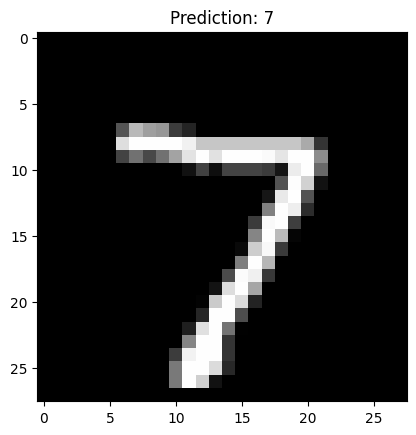

In [ ]:
index = 0
pred = np.argmax(model.predict(np.expand_dims(test_images[index], axis=0)))
plt.imshow(np.squeeze(test_images[index]), cmap='gray')
plt.title('Prediction: {}'.format(pred))

You should also examine examples of high-accuracy predictions. These may include both highly confident correct predictions and highly confident incorrect ones—each can provide useful insights. The following functions and code will help you perform this analysis.

In [ ]:
# define a python generator
import itertools

def generator(images, labels, batch_size):
    iterable_1 = iter(images)
    iterable_2 = iter(labels)
    while True:
        l1 = tuple(itertools.islice(iterable_1, 0, batch_size))
        l2 = tuple(itertools.islice(iterable_2, 0, batch_size))
        if l1 and l2:
            yield np.vstack(np.expand_dims(l1, axis=0)), np.vstack(np.expand_dims(l2, axis=0))
        else:
            break

test_generator = generator(test_images, test_labels, 20)

#### Sample Correct Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step


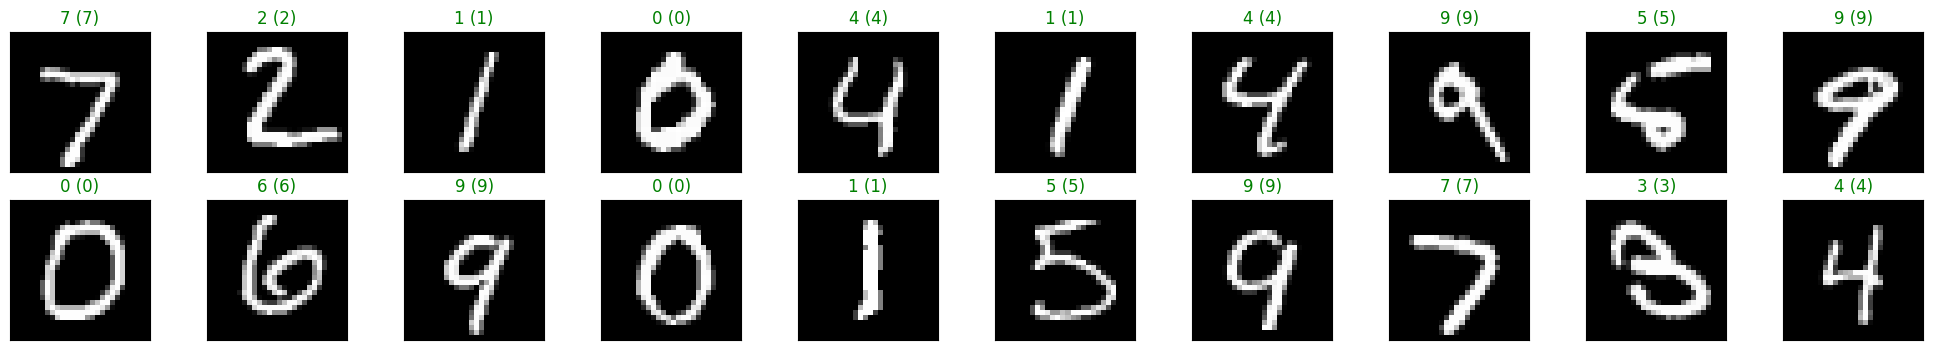

In [ ]:
images, labels = next(test_generator)
labels = np.argmax(labels, axis=-1)

# get sample outputs
preds = model.predict(images)
# convert output probabilities to predicted class
preds = np.argmax(preds, axis=-1)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

#### Sample Incorrect Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


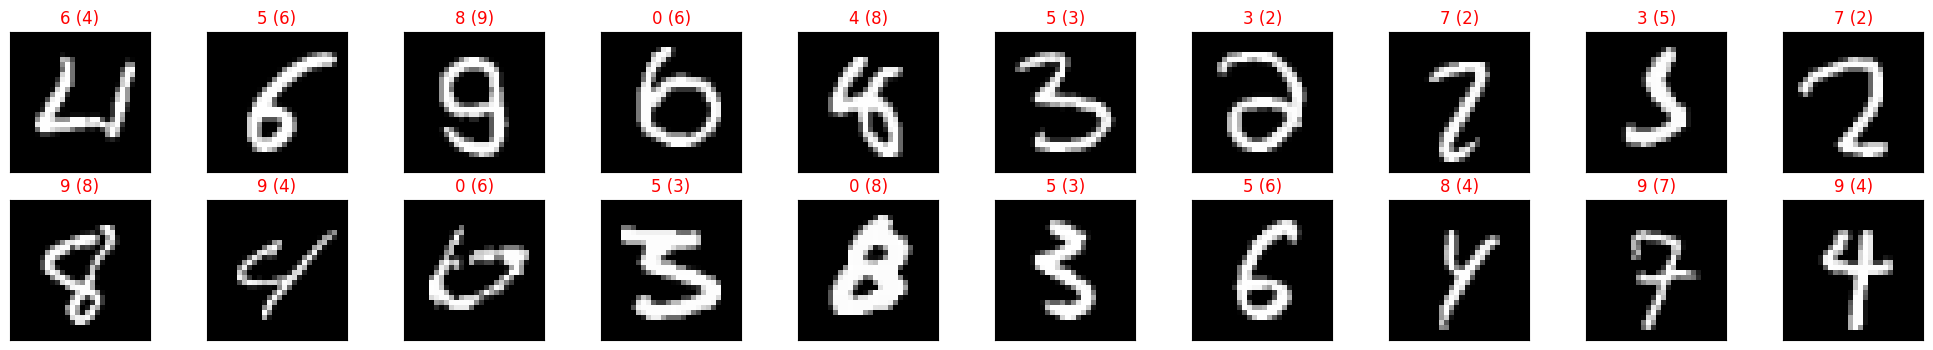

In [ ]:
# get a sample of incorrect predictions
preds = np.argmax(model.predict(test_images), axis=-1)
labels = np.argmax(test_labels, axis=-1)
incorrect_idxs = np.where( preds != labels )[0]

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for i in np.arange(20):
    idx = incorrect_idxs[i]
    ax = fig.add_subplot(2, 20//2, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

### Task 3: Correct vs. Incorrect Predictions
Record your observations on both the correct and incorrect prediction outputs in the Markdown cell below.

**Student Observations:** write your observations here : )

---
## 2.3 Interpret the Results
Up to this point, we’ve used several functions to build the model’s layers without examining what’s happening in detail.
Although the model achieves good accuracy, we still don’t fully understand what occurs inside it—this is often the case with deep learning networks.
However, a number of techniques have been developed to help interpret and visualize how these models work internally. In this section, we’ll explore a few of these approaches.

### Visualizing Activations of the Next-to-Last Layer

<p align="center">
  <img src="https://web.archive.org/web/20230815174847if_/https://thumbs.gfycat.com/DeadlyDeafeningAtlanticblackgoby-size_restricted.gif"
       alt="Second Last Layer Activations"
       width="800"/>
</p>

<p align="center">
  <em>Source: <a href="https://www.3blue1brown.com/" target="_blank">3Blue1Brown</a></em>
</p>

One useful way to understand what your model has learned is to visualize the activations of its final layers.

We’ll start by defining a new model, `emb_model`, which uses the same inputs as our original model (`model.layers[0].input`) but has its outputs taken from the second-to-last dense layer:

```emb_model = Model(inputs=model.layers[0].input, outputs=model.get_layer('dense').output)```

This gives us access to the intermediate activations right before the output layer.
If you’d like to visualize the final dense layer instead, you can change the output to:

```model.get_layer('dense_1').output```

**Note:** If you haven’t run the notebook strictly from top to bottom, your layer names might differ. Use `model.summary()` to verify the correct layer names before proceeding.

In [ ]:
from tensorflow.keras import Model
model.summary()

emb_model = Model(inputs = model.layers[0].input, outputs = model.get_layer('dense').output)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,646 (729.09 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,324 (364.55 KB)

Now let's look at what's inside the model by using `summary()` again:

In [ ]:
emb_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,672 (362.00 KB)

 Trainable params: 92,672 (362.00 KB)

 Non-trainable params: 0 (0.00 B)

Now we can feed the test images into our new model, `emb_model`. By setting `verbose=1`, we can monitor the progress and see detailed output during the computation.
At the same time, we will generate predictions from the original model using `model.predict`.

In [ ]:
activations = emb_model.predict(test_images, verbose=1)
predictions = model.predict(test_images, verbose=1)
labels = predictions.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Task 4: Understand the Output
Check the shape of the variable `activations`. It should be `(10000, 64)`. Why does it have $10,000$ rows and $64$ columns? Explain why this shape makes sense.

**Hint:** Think about how many test images you passed through the model and how many units are in the second-to-last dense layer.

**Student Observations:** write your observations here : )

In [ ]:
activations.shape

(10000, 64)

Now, let’s visualize the activations.
In the plot below, each column represents a neuron in the layer, while each row corresponds to a single test image.
This way, every row shows the activation pattern of all neurons for one image.

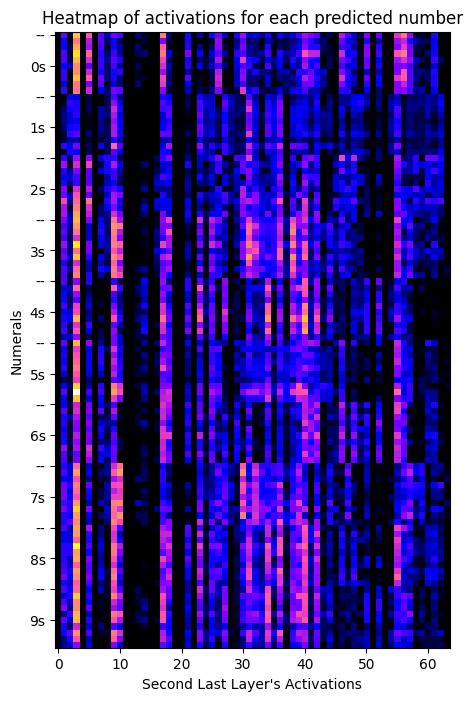

In [ ]:
# stack 10 examples of activation vectors for each numeral
seq = []
for i in range(10):
    seq.append(activations[labels==i][:10])
seq = np.vstack(seq)

# plot heatmap for the example activations
plt.figure(figsize=(8,8))
plt.imshow(seq, interpolation='nearest', cmap=plt.cm.gnuplot2)
plt.yticks(np.arange(0,100, 5), ['--','0s','--','1s','--','2s','--','3s','--','4s','--','5s','--','6s',
                                 '--','7s','--','8s','--','9s'])
plt.xlabel("Second Last Layer's Activations")
plt.ylabel('Numerals')
plt.title('Heatmap of activations for each predicted number')
plt.show()

By examining each horizontal band, which corresponds to a particular digit, you can observe that the activation patterns tend to be unique for each digit. To better visualize these 64-dimensional activation vectors, we can use a dimensionality reduction technique to map them into 2 or 3 dimensions.

Here, we will use $t$-distributed stochastic neighbor embedding [(t-SNE)](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), a statistical method that projects high-dimensional data into a two- or three-dimensional space while preserving the structure of the data as much as possible.

First, we will save the activation data for further analysis:

In [ ]:
import io

with io.open('vecs.tsv', 'w', encoding='utf-8') as out_v:
    for embed in activations:
        out_v.write('\t'.join([str(x) for x in embed]) + "\n")

with io.open('meta.tsv', 'w', encoding='utf-8') as out_m:
    for l in labels:
        out_m.write(str(l) + "\n")

### Task 5: Visualization with t-SNE
1. Open [TensorFlow's Embedding Projector](https://projector.tensorflow.org/)
2. In the **Data** panel, click **Load**
3. Upload the two files we saved in the previous cell:
    * `vecs.tsv` contains the activation vectors for each image.
    * `meta.tsv` contains metadata for each image (e.g., the corresponding digit label).

Once loaded, you will be able to explore the high-dimensional activation data in $2$D or $3$D using t-SNE. Your result should look something like the image below!


**Example Result for Task 5: Visualization with t-SNE**

<div style="text-align: center;">
    <img src="https://github.com/argonne-lcf/ai-science-training-series/blob/2021Series/02_deepLearning/images/tSNE.png?raw=true"
         alt="tSNE"
         style="width: 300px;"/>
</div>



### Visualizing Intermediate-Layer Activations
We can also explore the activations of intermediate layers, especially the convolutional layers.
Since there are many layers, we will select a single test image at random and examine how its features are represented throughout the network.

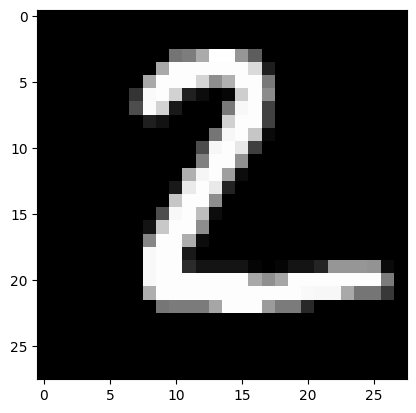

In [ ]:
img = test_images[1]
img = np.expand_dims(img, axis=0)

plt.imshow(np.squeeze(img), cmap='gray')
plt.show()

We want to create a new model, `activation_model`, that returns the outputs of the first few layers of our original model. This allows us to examine the intermediate activations for a given input image.

Since `model.input` may not be defined if the model hasn’t been built in the current session, we reference the input via the first layer explicitly (`model.layers[0].input`).

In [ ]:
from tensorflow.keras import Model

# Extract outputs of the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]

# Create a new model that returns these outputs given the first layer input
activation_model = Model(inputs=model.layers[0].input, outputs=layer_outputs)

# Pass a single image (with batch dimension) to get the activations
activations = activation_model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 707ms/step


You can inspect the activations of the first layer by printing `activations[0]`. Each of the $32$ filters produces a different feature map, revealing how the network responds to different patterns in the input image.

To examine individual filters, you can select them by their index. For example, the $6^{th}$ filter of the first layer is given by `[0, :, :, 6]`, while the $12^{th}$ filter of the first layer is given by `[0, :, :, 12]`. You can visualize each filter’s activation to see how the network emphasizes different features of the image.

In [ ]:
first_layer_activation = activations[0]

# double check the shape to make sure the layer structure match what you see in .summary()
print(first_layer_activation.shape)

(1, 26, 26, 32)


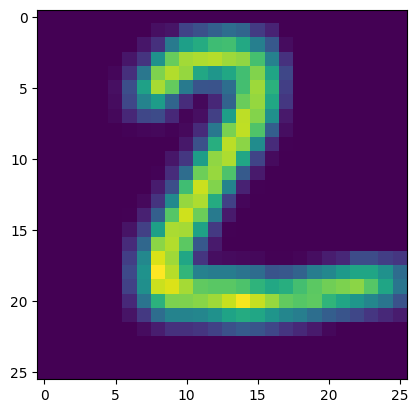

In [ ]:
plt.imshow(first_layer_activation[0, :, :, 6], cmap='viridis')
plt.show()

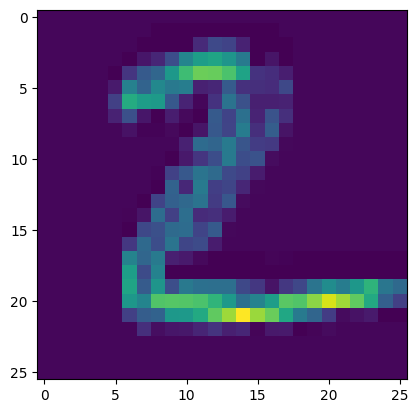

In [ ]:
plt.imshow(first_layer_activation[0, :, :, 12], cmap='viridis')
plt.show()

Examine the activations from the first convolutional layer above. What do you observe? Notice how some filters act like "edge detectors", highlighting vertical or horizontal features in the input image. In particular, `first_layer_activation[0, :, :, 6]` seems to work like vertical edge detector while `first_layer_activation[0, :, :, 12]` works like a horizontal edge detector.

### Task 6: Filter Observations
Now, select another filter and visualize its activation. Record your observations in the Markdown cell below. In particular, try to answer the following questions:
* What kind of features does this filter respond to?
* How does it differ from the previously examined filters?
* Are there any patterns that appear consistently across multiple images?

**Student Observations:** write your observations here : )

In [ ]:
# YOUR CODE HERE

You can explore and visualize the activations of all layers using the following code:


/tmp/ipython-input-1486639128.py:28: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/tmp/ipython-input-1486639128.py:31: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


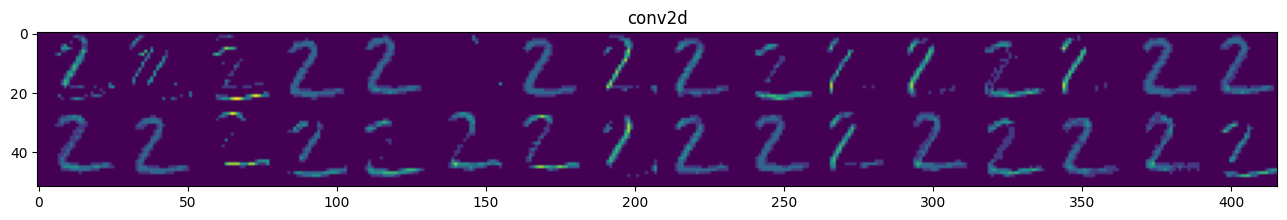

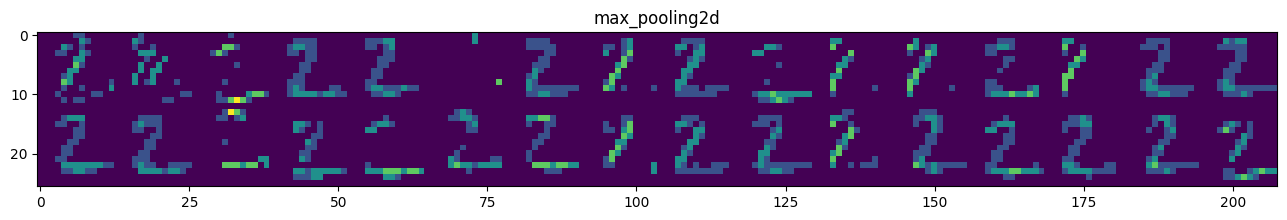

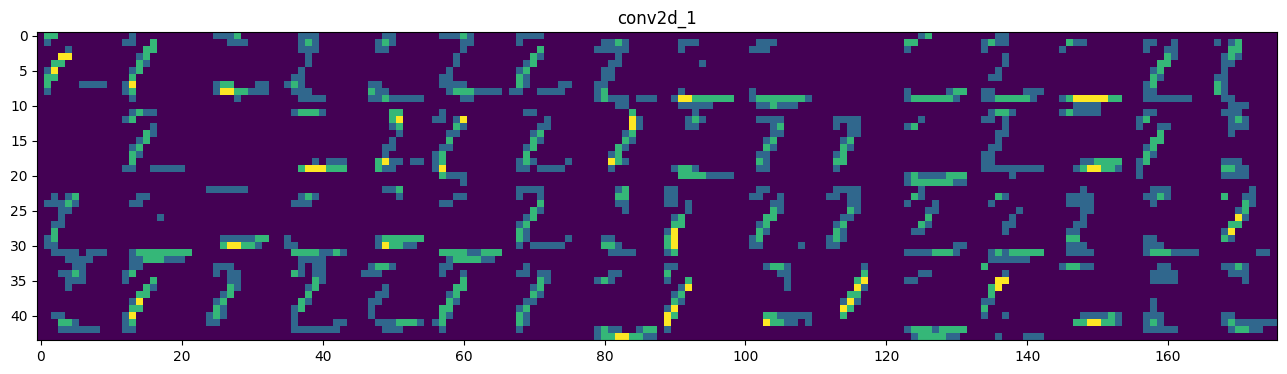

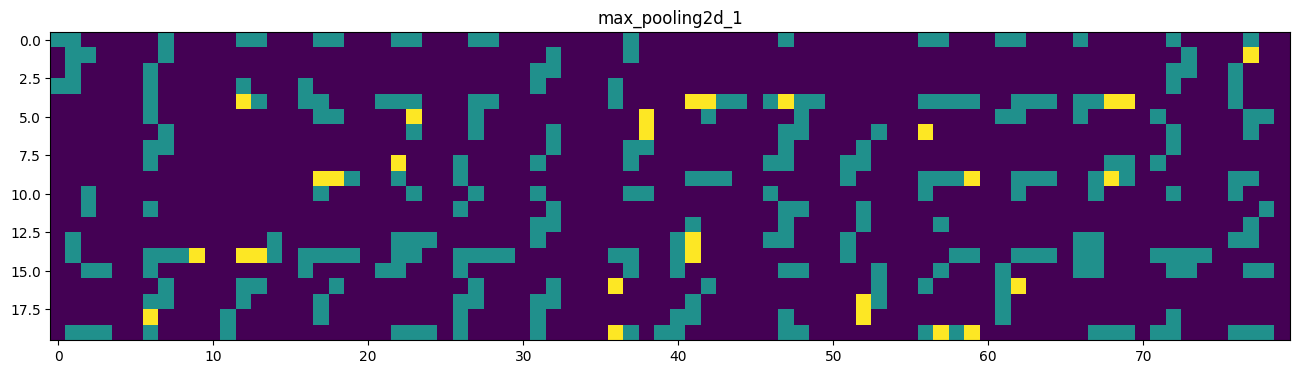

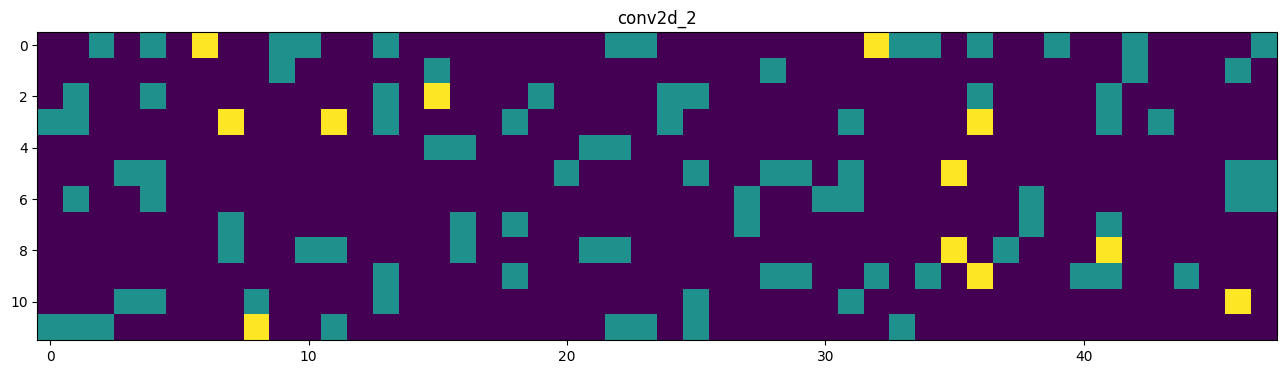

In [ ]:
# these are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name)

images_per_row = 16

# now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # this is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # the feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # we will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # we'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            #channel_image *= 64
            #channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

### Task 7: Understanding All Layers
Work with your classmates to analyze the activations from all layers. Record your observations and discuss what each layer appears to be detecting or representing in the output.

**Student Observations:** write your observations here : )

Due to time constraints, we won’t cover every detail in this session.
If you’d like to explore further, the following resources provide excellent insights:
1. [Visualizing and Understanding Convolutional Networks](https://arxiv.org/pdf/1311.2901.pdf)
1. [Visualizing Intermediate Activation in Convolutional Neural Networks with Keras](https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0)

---
# Part 3: More Deep-Learning Examples

We only showed a simple example in this class, but there are many fun examples one can do with deep learning.
Here are a few fun ones you can play around in your own time if you would like to do more deep learning.

1. [Google image classification](
https://developers.google.com/machine-learning/practica/image-classification): the classcial Cats vs Dongs classification


1. [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

1. [Text Classification](https://www.tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either positive or negative.

1. [Style Transfer](https://www.tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.

1. [Multilingual Universal Sentence Encoder Q&A](https://www.tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.

1. [Retraining an Image Classifier](https://www.tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.